# Part 0: Initial Data Import

## Downloading the data


In [1]:
# PART 0: Downloading the Data

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scikit_posthocs as sp 

from scipy.stats import levene, kruskal

# I put the data in a folder named data/
# The data is too large to upload to github, so this is only local. 
path_0 = "data/exported_new_results_nih_funded_gene_annotations_clean-000000000000.csv"
path_1 = "data/exported_new_results_nih_funded_gene_annotations_clean-000000000001.csv"

raw_data_0 = pd.read_csv(path_0)
raw_data_1 = pd.read_csv(path_1)


In [2]:
# Just looking at the parts of the data
print(raw_data_0.columns)
print(raw_data_0.shape)
print(raw_data_1.columns)
print(raw_data_1.shape)

Index(['DB_Object_Symbol', 'DB_Object_Name', 'DB_Object_ID', 'DB_Object_Type',
       'DB_Object_Synonym', 'GO_ID', 'Aspect', 'Qualifier', 'Evidence_Code',
       'pmid_extracted', 'PMID', 'DB_Reference', 'PROJECT_NUMBER',
       'APPLICATION_ID', 'PROJECT_TITLE', 'PI_NAMEs', 'ORG_NAME', 'ORG_STATE',
       'ORG_COUNTRY', 'TOTAL_COST', 'DIRECT_COST_AMT', 'INDIRECT_COST_AMT',
       'FY', 'PROJECT_START', 'PROJECT_END', 'ACTIVITY', 'FULL_PROJECT_NUM',
       'PROJECT_TERMS', 'PHR', 'annotation_date', 'Assigned_By', 'Taxon'],
      dtype='object')
(197441, 32)
Index(['DB_Object_Symbol', 'DB_Object_Name', 'DB_Object_ID', 'DB_Object_Type',
       'DB_Object_Synonym', 'GO_ID', 'Aspect', 'Qualifier', 'Evidence_Code',
       'pmid_extracted', 'PMID', 'DB_Reference', 'PROJECT_NUMBER',
       'APPLICATION_ID', 'PROJECT_TITLE', 'PI_NAMEs', 'ORG_NAME', 'ORG_STATE',
       'ORG_COUNTRY', 'TOTAL_COST', 'DIRECT_COST_AMT', 'INDIRECT_COST_AMT',
       'FY', 'PROJECT_START', 'PROJECT_END', 'ACTIVITY', 

## Combining and exploring the data

In [3]:
# PART 0.5: Combining the Data

# Concatenate the two datafiles together, check that it worked. 
data = pd.concat((raw_data_0, raw_data_1), ignore_index=True)
data.shape

(395002, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395002 entries, 0 to 395001
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DB_Object_Symbol   395002 non-null  object 
 1   DB_Object_Name     395002 non-null  object 
 2   DB_Object_ID       395002 non-null  object 
 3   DB_Object_Type     395002 non-null  object 
 4   DB_Object_Synonym  394840 non-null  object 
 5   GO_ID              395002 non-null  object 
 6   Aspect             395002 non-null  object 
 7   Qualifier          395002 non-null  object 
 8   Evidence_Code      395002 non-null  object 
 9   pmid_extracted     395002 non-null  int64  
 10  PMID               395002 non-null  int64  
 11  DB_Reference       395002 non-null  object 
 12  PROJECT_NUMBER     395002 non-null  object 
 13  APPLICATION_ID     395002 non-null  int64  
 14  PROJECT_TITLE      395002 non-null  object 
 15  PI_NAMEs           395002 non-null  object 
 16  OR

In [5]:
# Checking that the states and countries are what we expect.
print(data['ORG_STATE'].unique())
print(data['ORG_COUNTRY'].unique())

['NE' 'MA' 'KS' 'HI' 'BC' 'OH' 'MD' 'WA' 'WI' 'NY' 'PA' 'TX' 'GA' 'SC'
 'NC' 'DC' 'NJ' 'FL' 'TN' 'MO' 'CA' 'IA' 'VT' 'CT' 'MN' 'IL' 'RI' 'AR'
 'VA' 'MI' 'OR' 'AZ' 'CO' 'AL' 'KY' 'OK' 'MT' 'ME' 'IN' 'ND' nan 'NV' 'LA'
 'NH' 'UT' 'MS' 'NM' 'WV' 'WY' 'ON' 'PQ' 'DE' 'QC' 'SD']
['UNITED STATES' 'CANADA' 'COLOMBIA' 'UNITED KINGDOM' 'BELGIUM' 'ISRAEL'
 'SPAIN' 'AUSTRALIA' 'CHINA' 'BRAZIL']


In [6]:
# confirming  that nan is state is associated with non-US countries (does not need to be handled) 
data[data['ORG_STATE'].isna()]["ORG_COUNTRY"].unique()

array(['COLOMBIA', 'UNITED KINGDOM', 'BELGIUM', 'ISRAEL', 'SPAIN',
       'AUSTRALIA', 'CHINA', 'BRAZIL'], dtype=object)

In [7]:
# checking for other null values (want to look specifically at model organisms (RQ1) and proteins(RQ2))
print(data[data['PMID'].isna()])
print(data[data['Taxon'].isna()]) # organism group

print(data[data["PMID"].isna()]) # gene symbol, uniprot id 
print(data[data["pmid_extracted"].isna()]) # gene symbol, uniprot id 

Empty DataFrame
Columns: [DB_Object_Symbol, DB_Object_Name, DB_Object_ID, DB_Object_Type, DB_Object_Synonym, GO_ID, Aspect, Qualifier, Evidence_Code, pmid_extracted, PMID, DB_Reference, PROJECT_NUMBER, APPLICATION_ID, PROJECT_TITLE, PI_NAMEs, ORG_NAME, ORG_STATE, ORG_COUNTRY, TOTAL_COST, DIRECT_COST_AMT, INDIRECT_COST_AMT, FY, PROJECT_START, PROJECT_END, ACTIVITY, FULL_PROJECT_NUM, PROJECT_TERMS, PHR, annotation_date, Assigned_By, Taxon]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [DB_Object_Symbol, DB_Object_Name, DB_Object_ID, DB_Object_Type, DB_Object_Synonym, GO_ID, Aspect, Qualifier, Evidence_Code, pmid_extracted, PMID, DB_Reference, PROJECT_NUMBER, APPLICATION_ID, PROJECT_TITLE, PI_NAMEs, ORG_NAME, ORG_STATE, ORG_COUNTRY, TOTAL_COST, DIRECT_COST_AMT, INDIRECT_COST_AMT, FY, PROJECT_START, PROJECT_END, ACTIVITY, FULL_PROJECT_NUM, PROJECT_TERMS, PHR, annotation_date, Assigned_By, Taxon]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [DB_Object_Symbol, DB_Obj

In [8]:
# DB_Object_Type is kinda useless. 
data['DB_Object_Type'].unique()

array(['protein'], dtype=object)

In [9]:
data.head()

,DB_Object_Symbol,DB_Object_Name,DB_Object_ID,DB_Object_Type,DB_Object_Synonym,GO_ID,Aspect,Qualifier,Evidence_Code,pmid_extracted,...,FY,PROJECT_START,PROJECT_END,ACTIVITY,FULL_PROJECT_NUM,PROJECT_TERMS,PHR,annotation_date,Assigned_By,Taxon
0,Pink1,"Serine/threonine-protein kinase PINK1, mitocho...",B5DFG1,protein,Pink1,GO:0031999,P,involved_in,HMP,25421206,...,2014,2005-02-10,2016-03-31,R01,5R01MH073490-11,Address;AIDS neuropathy;Autophagocytosis;Brain...,While treatment for HIV infection has improve...,20210212,RGD,taxon:10116
1,Pink1,"Serine/threonine-protein kinase PINK1, mitocho...",B5DFG1,protein,Pink1,GO:0000266,P,involved_in,HMP,25421206,...,2014,2005-02-10,2016-03-31,R01,5R01MH073490-11,Address;AIDS neuropathy;Autophagocytosis;Brain...,While treatment for HIV infection has improve...,20210212,RGD,taxon:10116
2,Nf1,"Neurofibromin 1, isoform B",Q9VBJ2,protein,Nf1|Dmel\CG8318|FBpp0084326|NF-1|NF1|Nf-1|dNF1...,GO:0008344,P,involved_in,IMP,25962619,...,2016,2008-09-01,2020-07-31,R01,2R01GM084947-09,Address;base;Cells;Clustered Regularly Intersp...,PROJECT NARRATIVE This project is seeking cont...,20160811,FlyBase,taxon:7227
3,Cirl,Latrophilin Cirl,A1Z7G7,protein,Cirl|CG8639,GO:0008344,P,involved_in,IMP,25962619,...,2013,2008-09-01,2016-07-31,R01,5R01GM084947-06,NaN,This project is seeking continued support...,20160811,FlyBase,taxon:7227
4,DAT,Sodium-dependent dopamine transporter,Q7K4Y6,protein,DAT|fmn|CG8380,GO:0008344,P,involved_in,IMP,25962619,...,2014,2008-09-01,2016-07-31,R01,5R01GM084947-07,Address;base;Biological;Biological Assay;Biolo...,This project is seeking continued support...,20160811,FlyBase,taxon:7227


In [10]:
print(len(data['PROJECT_NUMBER']), len(data['PROJECT_NUMBER'].unique()))

395002 4970


## Creating new taxon and cost columns

In [11]:
# for each project taxon, divide money by number of taxons that project has (avoids double counting and 
# maintains assumption of independence)
data['num_taxons'] = data.groupby('PROJECT_NUMBER')['Taxon'].transform('count')
data['num_function'] = data.groupby('PROJECT_NUMBER')['GO_ID'].transform('count')

data['TAXON_TOTAL_COST'] = data['TOTAL_COST']/data['num_taxons'] 
data['FUNCTION_TOTAL_COST'] = data['TOTAL_COST']/data['num_function'] 

# Part 1: High Level Overview

<Axes: >

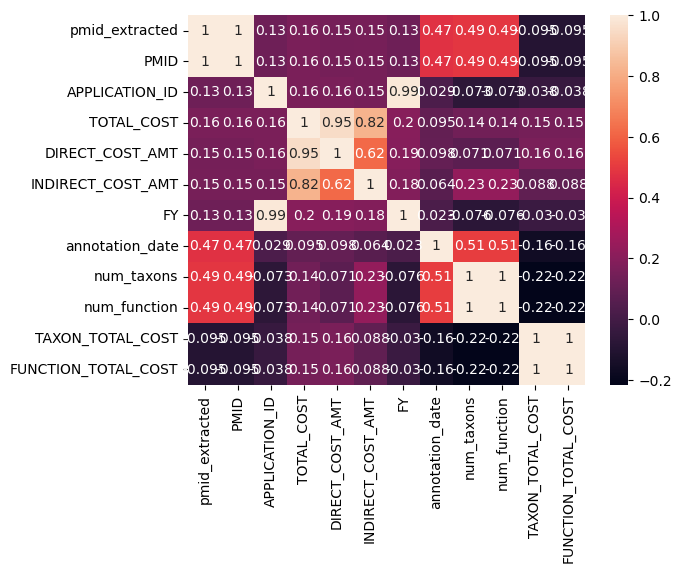

In [12]:
# -- PART 1: High Level Overview 

# correlation map on quantitative variables (general)
corr_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True)

The above graph shows the correlations between all the numberical variables in our dataframe. 

# Part 2: General Functions

These functions are used throughout the rest of the document. 

In [13]:
# -- PART 2: General Functions 
# create a total cost rank column for a given cost column in a df
def add_rank_cols(df, cost_col):
    df['total_cost_rank'] = df[cost_col].rank(method = 'min', ascending=False).astype(int)
    return df 

# given data from 2013 to 2022, rank column to see how the taxon ranks over time  
def add_rank_by_year(df, year, new_col_name):
    df[new_col_name] = df[year].rank(method = 'min', ascending=False).astype('Int64')
    return df 

# get top x data points for a specific column in a df (asc = if True, return in ascending order, o/w descending)
def get_top_x(df, col, num, asc): 
    mod_df = df.sort_values(col, ascending = True).head(num).reset_index()
    mod_df = mod_df.sort_values(col, ascending = asc)

    return mod_df 

# given the aggregated data column (prior to taking only top) and then the top 10, 
# create a column Other that has the cost_col of all the non-top 10 
def format_for_pie(agg_df, top_df, cost_col, var_col): 
    count = top_df[cost_col].to_list()
    labels = top_df[var_col].to_list()

    # get other column, then add to count and labels list 
    other = agg_df[cost_col].sum() - top_df[cost_col].sum()
    count.append(other)
    labels.append('Other')

    return count, labels 


# RQ1
## Money vs. model organisms?

In [14]:
# -- PART 3: RQ1 - How much NIH money is spent on different model organisms? Is there a bias?

# x = model organism = Taxon, y = TOTAL_COST

# Task 1: Evaluate overall NIH money across all time (do year after)

# group data by total cost per taxon across all time 
df_cost_taxon = data[['Taxon', 'TAXON_TOTAL_COST']]
tot_cost_per_taxon = df_cost_taxon.groupby('Taxon').agg(
    #num_projects = ('Taxon', 'size'), 
    total_cost = ('TAXON_TOTAL_COST', 'sum')
    ).sort_values(by = 'total_cost', ascending=False)

# add ranking columns for how they rank against other taxons 
tot_cost_per_taxon = add_rank_cols(tot_cost_per_taxon, 'total_cost')

tot_cost_per_taxon.head()

,total_cost,total_cost_rank
Taxon,,
taxon:9606,6.377140e+08,1
taxon:10090,5.658119e+08,2
taxon:7955,1.871745e+08,3
taxon:7227,1.271345e+08,4
taxon:10116,9.033587e+07,5


## Bar Charts and Pie Charts

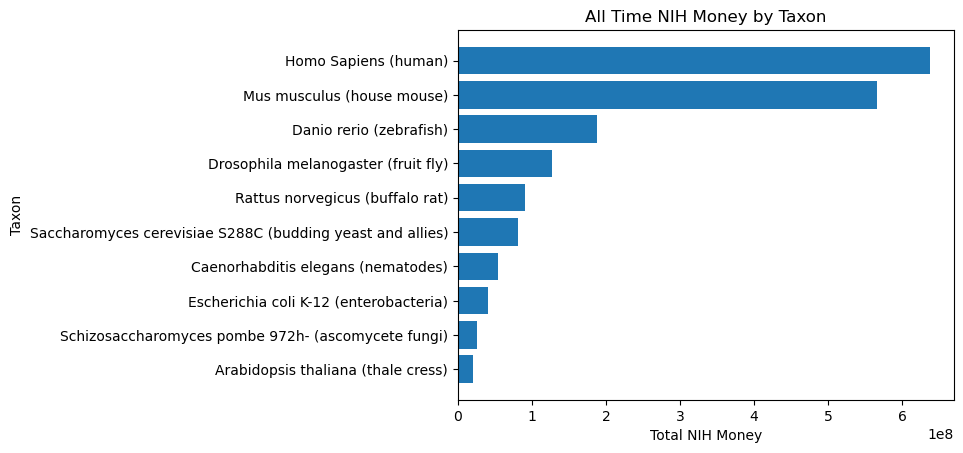

In [15]:
# get top 10 taxons with the highest total cost 
t10_taxon_cost = get_top_x(tot_cost_per_taxon, 'total_cost_rank', 10, False)

# map to human terminology 
mapping = {
    'taxon:9606':'Homo Sapiens (human)',
    'taxon:10090':'Mus musculus (house mouse)',
    'taxon:7227':'Drosophila melanogaster (fruit fly)',
    'taxon:559292':'Saccharomyces cerevisiae S288C (budding yeast and allies)',
    'taxon:7955':'Danio rerio (zebrafish)',
    'taxon:6239':'Caenorhabditis elegans (nematodes)',
    'taxon:185431':'Trypanosoma brucei brucei TREU927 (kinetoplastids)',
    'taxon:10116':'Rattus norvegicus (buffalo rat)',
    'taxon:284812':'Schizosaccharomyces pombe 972h- (ascomycete fungi)',
    'taxon:83333':'Escherichia coli K-12 (enterobacteria)',
    'taxon:3702':'Arabidopsis thaliana (thale cress)'
}

t10_taxon_cost['Taxon'] = t10_taxon_cost['Taxon'].replace(mapping)

# visualize as a bar plot 
plt.barh(t10_taxon_cost['Taxon'], t10_taxon_cost['total_cost'])
plt.xlabel('Total NIH Money')
plt.ylabel('Taxon')
plt.title('All Time NIH Money by Taxon')
plt.show()

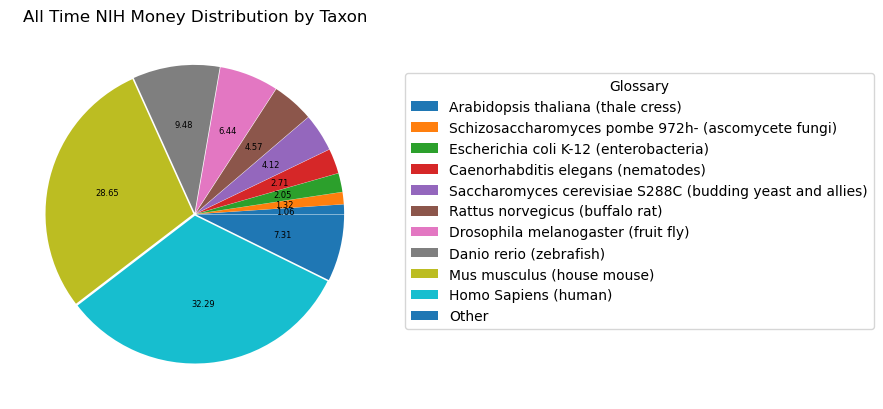

In [16]:
# visualize as a pie chart, comparing against ALL others 
t10_taxon_pie = format_for_pie(tot_cost_per_taxon, t10_taxon_cost, 'total_cost', 'Taxon')
plt_explode = [0.01]*11 #[0,0,0,0,0,0,0,0,0,0,0]
#plt.pie(t10_taxon_pie[0], explode = plt_explode)
plt.pie(t10_taxon_pie[0], autopct='%.2f', textprops = {'fontsize':6}, explode = plt_explode)
plt.legend(t10_taxon_pie[1], title = 'Glossary', bbox_to_anchor = (1.05, 0.9))
plt.title('All Time NIH Money Distribution by Taxon')
plt.show()

## Consistent across time?

In [17]:
# Task 2: Now that we know the overall max, we want to see if these rankings are consistent over time 

# create dataframes that look at the total cost and the number of projects over time
df_rank_time = data[['Taxon', 'TAXON_TOTAL_COST', 'FY']]

taxon_rank_cost_by_year = df_rank_time.groupby(['Taxon', 'FY']).agg(
#    num_projects = ('Taxon', 'size'), 
    total_cost = ('TAXON_TOTAL_COST', 'sum')
).reset_index().pivot(index='Taxon', columns = 'FY', values = 'total_cost')

# add ranking columns for how they rank against other taxons (cost)
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2016, '2016_rank')
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2017, '2017_rank')
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2018, '2018_rank')
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2019, '2019_rank')
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2020, '2020_rank')
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2021, '2021_rank')
taxon_rank_cost_by_year = add_rank_by_year(taxon_rank_cost_by_year, 2022, '2022_rank')

taxon_rank_cost_by_year.head(20)

FY,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2016_rank,2017_rank,2018_rank,2019_rank,2020_rank,2021_rank,2022_rank
Taxon,,,,,,,,,,,,,,,,,
taxon:10036,8.613333e+03,8.866667e+03,8.911905e+03,9.047619e+03,NaN,NaN,NaN,NaN,NaN,NaN,120,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
taxon:10090,6.848804e+07,6.756321e+07,7.115934e+07,7.227789e+07,6.836378e+07,6.306487e+07,5.262364e+07,4.293762e+07,3.322792e+07,2.610560e+07,2,2,2,2,2,2,2
taxon:10090|taxon:64320,NaN,NaN,NaN,NaN,NaN,1.065511e+04,1.036526e+04,1.049996e+04,1.002054e+04,1.823794e+04,<NA>,<NA>,106,96,84,69,55
taxon:10116,1.618577e+07,1.372187e+07,1.142331e+07,1.075375e+07,9.663762e+06,8.542293e+06,6.543712e+06,5.365700e+06,4.531283e+06,3.604413e+06,5,5,6,6,6,6,6
taxon:10254,1.793647e+05,1.914283e+05,2.096649e+05,1.736530e+05,3.378000e+05,2.868497e+05,2.880979e+05,3.268974e+05,2.756682e+05,9.473976e+04,29,22,22,23,20,20,30
taxon:10299,2.639258e+05,4.123081e+05,4.023123e+05,3.693166e+05,3.843456e+05,2.804657e+05,2.018160e+05,2.994687e+05,1.897002e+05,9.896712e+04,18,20,23,28,22,25,28
taxon:10315,8.152444e+03,7.907867e+03,8.152444e+03,8.152444e+03,8.152444e+03,NaN,9.478889e+03,9.478889e+03,9.478889e+03,9.289311e+03,122,117,<NA>,98,86,72,61
taxon:10377,3.485196e+04,3.588648e+04,3.690744e+04,3.680928e+04,3.720000e+03,NaN,NaN,NaN,NaN,NaN,88,123,<NA>,<NA>,<NA>,<NA>,<NA>
taxon:10665,7.795657e+04,8.187186e+04,9.322500e+04,9.126071e+04,9.126071e+04,9.126071e+04,9.126071e+04,NaN,NaN,NaN,51,50,49,47,<NA>,<NA>,<NA>


In [18]:
# look at the top 5 taxons and drop all columns unrelated to rank
t5_taxon = ['taxon:9606', 'taxon:10090', 'taxon:7955', 'taxon:7227', 'taxon:10116']
t5_taxon_rank_cost_by_year = taxon_rank_cost_by_year[
    taxon_rank_cost_by_year.index.isin(t5_taxon)
].sort_values('2016_rank', ascending=True).reset_index()[
    ['Taxon', '2016_rank', '2017_rank', '2018_rank', '2019_rank', '2020_rank', '2021_rank', '2022_rank']
]

# map to human terminology 
taxon_mapping = {
    'taxon:9606':'Homo Sapiens (human)',
    'taxon:10090':'Mus musculus (house mouse)',
    'taxon:7227':'Drosophila melanogaster (fruit fly)',
    'taxon:559292':'Saccharomyces cerevisiae S288C (budding yeast and allies)',
    'taxon:7955':'Danio rerio (zebrafish)',
    'taxon:6239':'Caenorhabditis elegans (nematodes)',
    'taxon:185431':'Trypanosoma brucei brucei TREU927 (kinetoplastids)',
    'taxon:10116':'Rattus norvegicus (buffalo rat)',
    'taxon:284812':'Schizosaccharomyces pombe 972h- (ascomycete fungi)',
    'taxon:83333':'Escherichia coli K-12 (enterobacteria)',
    'taxon:3702':'Arabidopsis thaliana (thale cress)'
}

t5_taxon_rank_cost_by_year['Taxon'] = t5_taxon_rank_cost_by_year['Taxon'].replace(taxon_mapping)
t5_taxon_rank_cost_by_year

FY,Taxon,2016_rank,2017_rank,2018_rank,2019_rank,2020_rank,2021_rank,2022_rank
0,Homo Sapiens (human),1,1,1,1,1,1,1
1,Mus musculus (house mouse),2,2,2,2,2,2,2
2,Danio rerio (zebrafish),3,3,3,3,3,3,3
3,Drosophila melanogaster (fruit fly),4,4,4,4,4,4,4
4,Rattus norvegicus (buffalo rat),5,5,6,6,6,6,6


## Human projects across time

In [19]:
# Task 3: Given that human is clearly the most heavily funded and has the most 
# number of projects, lets take a look at how funding and number of projects has 
# varied over time 

# 1 = taxon:9606 (human), 2 = taxon:10090 (house mouse), 3 = taxon:7227 (fruit fly), 
# 4 = taxon:559292 (brewer's yeast), 5 = taxon:7955 (zebrafish)
#df_rank_time = data[['Taxon', 'TOTAL_COST', 'FY']]

# filter for only human taxons 
taxon_human = data[data['Taxon'] == 'taxon:9606'][['TAXON_TOTAL_COST', 'FY']]

# get total cost and number of projects per year 
taxon_human_cost = taxon_human.groupby('FY').agg(
    total_cost = ('FY', 'sum')
).reset_index()

taxon_human_cost.head()

,FY,total_cost
0,2013,39400449
1,2014,52881598
2,2015,59517055
3,2016,59399424
4,2017,52008345


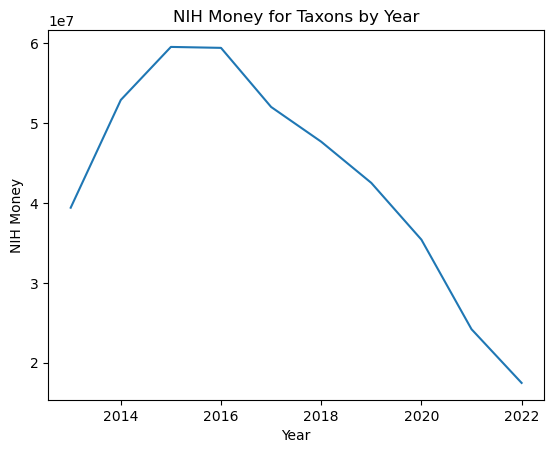

In [20]:
# plot a line graph showing how total cost and num projects have varied over time
plt.plot(taxon_human_cost['FY'], taxon_human_cost['total_cost'], label = 'Total NIH Funding of Projects')
plt.xlabel('Year')
plt.ylabel('NIH Money')
plt.title('NIH Money for Taxons by Year')
plt.show()

## Stats for Bias

In [21]:
# Task 4: Run a statistical test to see if there is any bias in the NIH funding for different 
# model organisms (spoiler alert: answer is yes)

# Kruskal-Wallis: checks for stat. significant differences between them 
# assumptions: ordinal (yes), independent samples (yes), 
# distributions of the groups must have the same shape (uncertain)

rq1_stat_df = data[['Taxon', 'TAXON_TOTAL_COST']]

# create boxplot to check same shape 
#boxplot = sns.FacetGrid(rq1_stat_df, col = 'Taxon', col_wrap = 5, sharey = False)
#boxplot.map(sns.boxplot, 'TOTAL_COST')

In [22]:
# boxplot is difficult to visualize so switching to checking if distribution has similar 
# variance via Levene (conclusion: statistically significant, assumption is violated)
list_of_taxons = rq1_stat_df['Taxon'].unique()

data_by_taxon = []
kept_taxons = []
for taxon in list_of_taxons: 
    data_points = rq1_stat_df[rq1_stat_df['Taxon'] == taxon]['TAXON_TOTAL_COST'].values

    # avoids nan issue with fewer than 5 data points
    if len(data_points) > 50 and np.std(data_points) > 0: 
        data_by_taxon.append(data_points)
        kept_taxons.append(taxon)

f, p = levene(*data_by_taxon)
print(f, p)
#len(kept_taxons)

175.36286035959716 0.0


In [23]:
# Run Kruskal-Wallis test (high significance value, indicating a bias)
H, p = kruskal(*data_by_taxon)
print(H, p)
len(kept_taxons)

93402.62135679061 0.0


55

Text(0.5, 1.0, 'Heat Map of Dunn Test Results (p-values)')

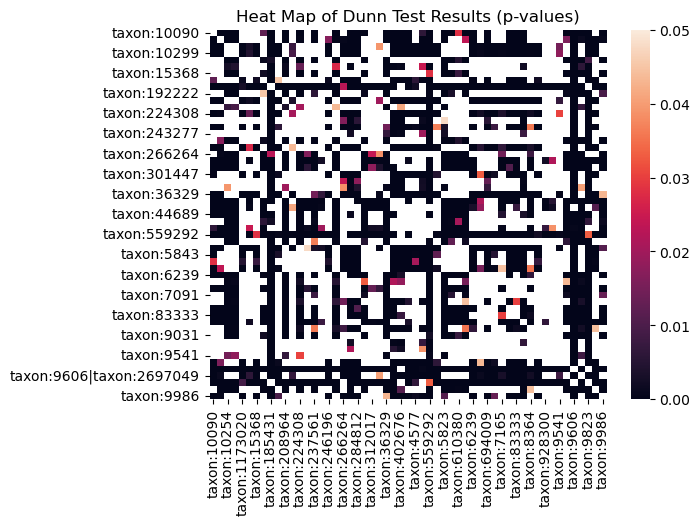

In [24]:
# Run Dunn Test (post-hoc)

# remove N/A values from df
dunn_df = rq1_stat_df[rq1_stat_df['Taxon'].isin(kept_taxons)][['Taxon', 'TAXON_TOTAL_COST']]
p_values = sp.posthoc_dunn(
    dunn_df, 
    group_col = 'Taxon',
    val_col = 'TAXON_TOTAL_COST', 
    p_adjust='holm'
)


# use correlation matrix to visualize statistical significance (only looking at p<0.5)
plt.figure()
sns.heatmap(
    p_values.where(p_values <= 0.05),
    vmin = 0, 
    vmax = 0.05
)
plt.title("Heat Map of Dunn Test Results (p-values)")

# values are filtered for statistical significance, can see several extremely dark values
# specifically black, indicating high presence of bias in NIH funding based on taxon 

# RQ2
## Money vs. proteins

In [25]:
# -- PART 4: RQ2 - How much NIH money is spent on different proteins? Is there a bias?

# protein = DB_Object_ID  

In [26]:
data['num_proteins'] = data.groupby('PROJECT_NUMBER')['DB_Object_ID'].transform('count')
data['cost_per_protein'] = data['TOTAL_COST']/data['num_proteins']

data['cost_per_protein'].head()

0    87290.250000
1    87290.250000
2     1099.708844
3     1054.930612
4     1077.327891
Name: cost_per_protein, dtype: float64

In [27]:
# Get some basic statistics on proteins
protein_data = data[['DB_Object_ID', 'TOTAL_COST', 'cost_per_protein', 'PMID', 'PROJECT_NUMBER']]
print(f"number of proteins: {len(protein_data['DB_Object_ID'].unique())}")
print(f"number of PMIDs: {len(protein_data['PMID'].unique())}")
print(f"number of Projects: {len(protein_data['PROJECT_NUMBER'].unique())}")

total_cost_per_protein = protein_data.groupby('DB_Object_ID').agg(
    num_projects = ('DB_Object_ID', 'size'), 
    cost = ('cost_per_protein', 'sum')
).sort_values(by = ['cost', 'num_projects'], ascending=[False, False])
print(total_cost_per_protein.head(10))

number of proteins: 15557
number of PMIDs: 4246
number of Projects: 4970
              num_projects          cost
DB_Object_ID                            
Q9JLQ0                 426  6.374287e+06
Q99NH8                 714  5.774365e+06
F1QC10                  42  5.437554e+06
P0DTC2                 300  4.765329e+06
E7FER3                  84  4.502523e+06
Q91V24                 164  4.491937e+06
Q9NZC2                 690  4.239354e+06
Q61584                 110  3.679578e+06
Q9CPW0                 320  3.543105e+06
Q8C6L5                 306  3.206044e+06


In [56]:
# add ranking columns for how they rank against other taxons 
total_cost_per_protein = add_rank_cols(total_cost_per_protein, 'cost')

# get top 10 taxons with the highest total cost 
t10_protein_cost = get_top_x(total_cost_per_protein, 'total_cost_rank', 10, False)

t10_protein_cost.head(10)

,DB_Object_ID,num_projects,cost,total_cost_rank
9,Q8C6L5,306,3.206044e+06,10
8,Q9CPW0,320,3.543105e+06,9
7,Q61584,110,3.679578e+06,8
6,Q9NZC2,690,4.239354e+06,7
5,Q91V24,164,4.491937e+06,6
4,E7FER3,84,4.502523e+06,5
3,P0DTC2,300,4.765329e+06,4
2,F1QC10,42,5.437554e+06,3
1,Q99NH8,714,5.774365e+06,2
0,Q9JLQ0,426,6.374287e+06,1


## Bar Charts and Pie Charts

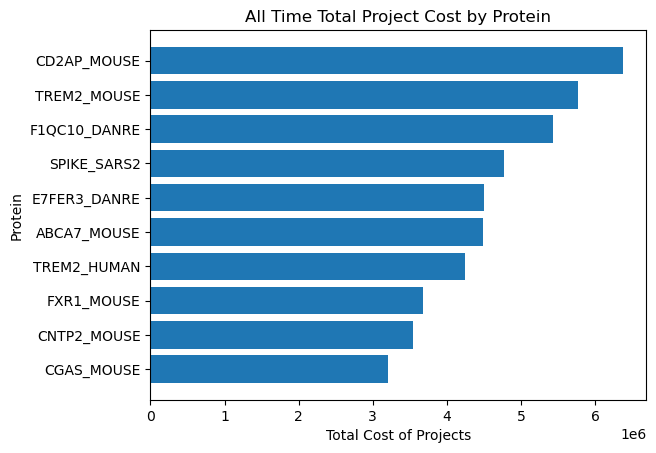

In [ ]:
protein_mapping = {
    "Q8C6L5":	"CGAS_MOUSE",
	"Q9CPW0":	"CNTP2_MOUSE",
	"Q61584":	"FXR1_MOUSE",
	"Q9NZC2":	"TREM2_HUMAN",
	"Q91V24":	"ABCA7_MOUSE",
	"E7FER3":	"E7FER3_DANRE",
	"P0DTC2":	"SPIKE_SARS2",
	"F1QC10":	"F1QC10_DANRE",
	"Q99NH8":	"TREM2_MOUSE",
	"Q9JLQ0":	"CD2AP_MOUSE"
}

# Replace Object ID with protein names
t10_protein_cost['DB_Object_ID'] = t10_protein_cost['DB_Object_ID'].replace(protein_mapping)

# visualize as a bar plot 
plt.barh(t10_protein_cost['DB_Object_ID'], t10_protein_cost['cost'])
plt.xlabel('Total Cost of Projects')
plt.ylabel('Protein')
plt.title('All Time Total Project Cost by Protein')
plt.show()


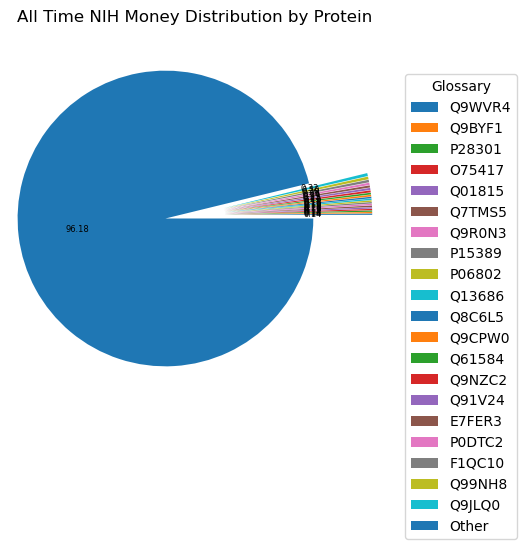

In [81]:
# visualize as a pie chart, comparing against ALL others 
t20_protein_cost = get_top_x(total_cost_per_protein, 'total_cost_rank', 20, False)

t20_protein_pie = format_for_pie(total_cost_per_protein, t20_protein_cost, 'cost', 'DB_Object_ID')
plt_explode = [0.2]*21 #[0,0,0,0,0,0,0,0,0,0,0]
#plt.pie(t10_taxon_pie[0], explode = plt_explode)
plt.pie(t20_protein_pie[0], autopct='%.2f', textprops = {'fontsize':6}, explode = plt_explode)
plt.legend(t20_protein_pie[1], title = 'Glossary', bbox_to_anchor = (1.05, 0.9))
plt.title('All Time NIH Money Distribution by Protein')
plt.show()

## Stats for Bias

In [30]:
# Task 4: Run a statistical test to see if there is any bias in the NIH funding for different 
# model organisms (spoiler alert: answer is yes)

# Kruskal-Wallis: checks for stat. significant differences between them 
# assumptions: ordinal (yes), independent samples (yes), 
# distributions of the groups must have the same shape (uncertain)

protein_cost_df = data[['DB_Object_ID', 'cost_per_protein']]
print(f"Protein costs shape: {protein_cost_df.shape}")

# Create a df with the total costs per protein in order. Then we 
# can get the top x proteins easily. 
# There are 15,557 unique proteins here.
protein_cost_ranks = protein_cost_df.groupby('DB_Object_ID').agg(
    total_cost = ('cost_per_protein', 'sum')
).sort_values(by = 'total_cost', ascending = False).reset_index()
print(f"Protein cost ranks shape: {protein_cost_ranks.shape}")

print(f"protein cost ranks head:\n{protein_cost_ranks.head(10)}")

# t10_proteins_cost = protein_cost_ranks.head(10)
# print(t10_proteins_cost.head(10))

# t10_proteins_filtered = protein_cost_df[
#     protein_cost_df['DB_Object_ID'].isin(t10_proteins_cost['DB_Object_ID'])
# ]

# print(t10_proteins_filtered.head(10))
# print(t10_proteins_filtered.shape)

Protein costs shape: (395002, 2)
Protein cost ranks shape: (15557, 2)
protein cost ranks head:
  DB_Object_ID    total_cost
0       Q9JLQ0  6.374287e+06
1       Q99NH8  5.774365e+06
2       F1QC10  5.437554e+06
3       P0DTC2  4.765329e+06
4       E7FER3  4.502523e+06
5       Q91V24  4.491937e+06
6       Q9NZC2  4.239354e+06
7       Q61584  3.679578e+06
8       Q9CPW0  3.543105e+06
9       Q8C6L5  3.206044e+06


/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


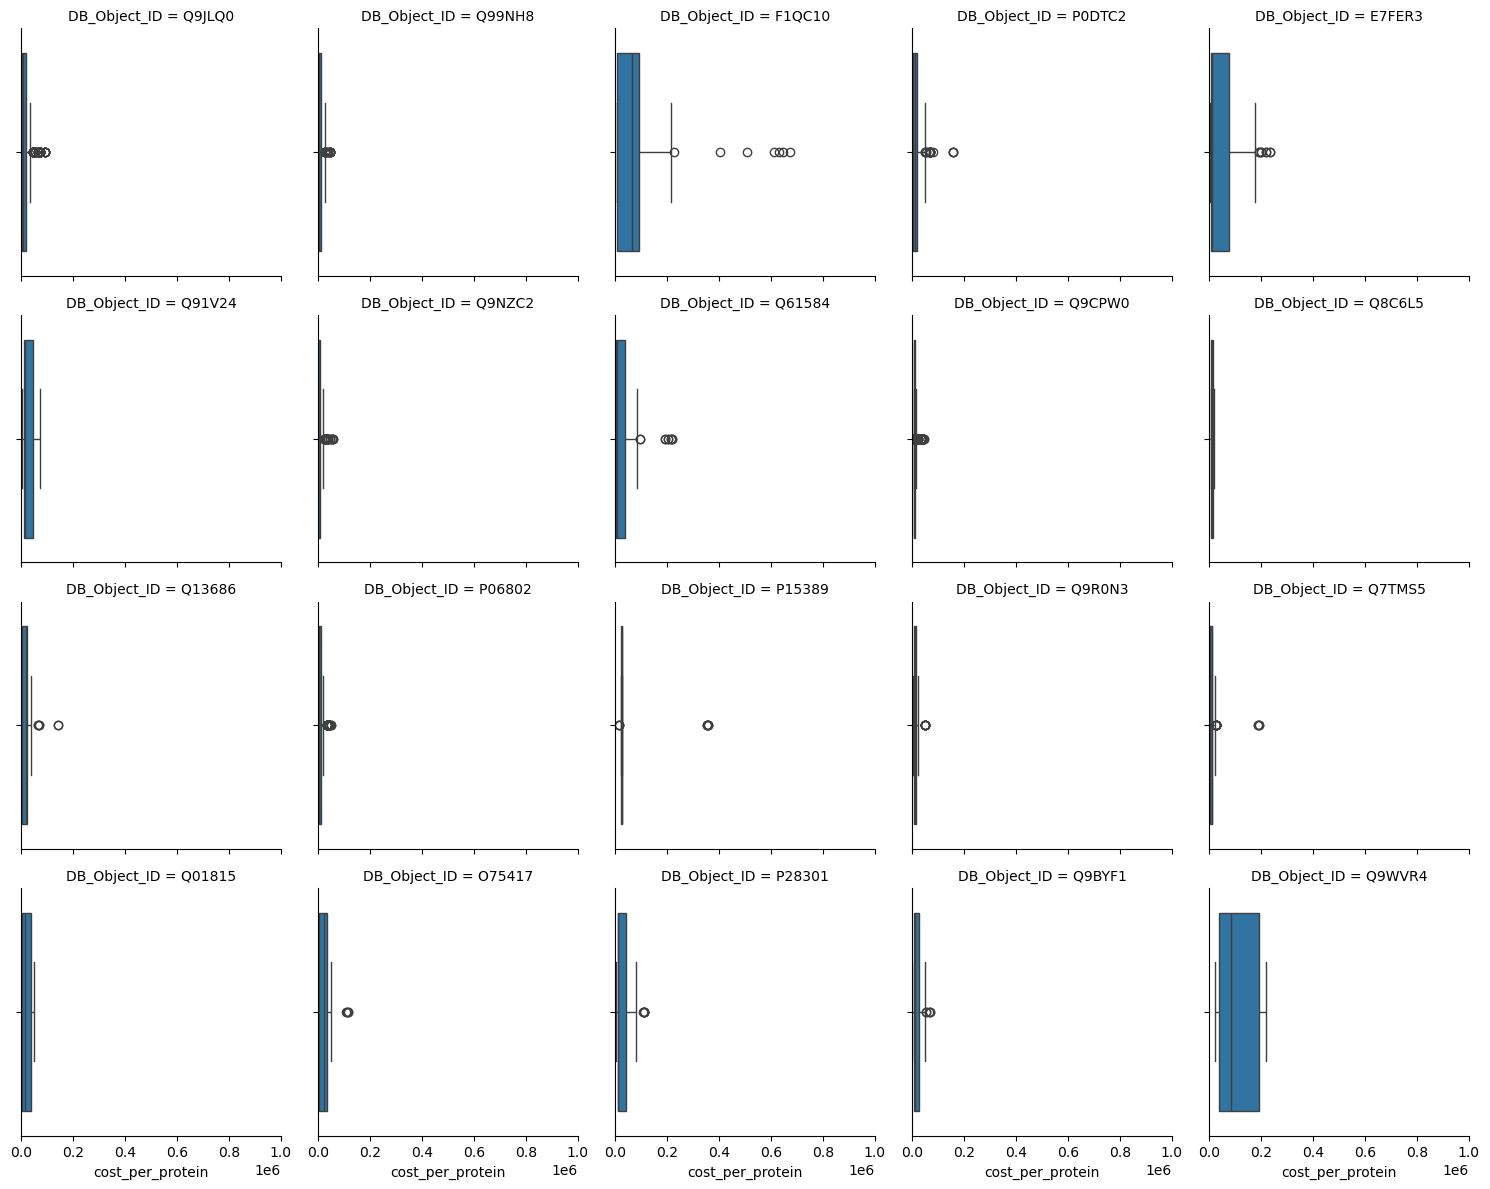

In [ ]:
# create boxplot to check same shape 
t20_proteins = protein_cost_df[
    protein_cost_df['DB_Object_ID'].isin(protein_cost_ranks['DB_Object_ID'].head(20))
]

boxplot = sns.FacetGrid(t20_proteins, 
                        col = 'DB_Object_ID', 
                        col_wrap = 5, 
                        col_order = protein_cost_ranks['DB_Object_ID'].head(20), 
                        xlim=(0, 1_000_000),
                        sharey = True,
                        sharex = True)
boxplot.map(sns.boxplot, 'cost_per_protein')

In [ ]:
# boxplot is difficult to visualize so switching to checking if distribution has similar 
# variance via Levene (conclusion: statistically significant, assumption is violated)

# NOTE: this cell takes about 2 minutes to run if we use the full list of proteins.
# So we are only going to check this among the top N proteins. 
# We can run the next few cells with different values of N to see how it affects the results.

N = 30

rq2_stat_df = protein_cost_df[
    protein_cost_df['DB_Object_ID'].isin(protein_cost_ranks['DB_Object_ID'].head(N))
]

list_of_proteins = rq2_stat_df['DB_Object_ID'].unique()

data_by_protein = []
kept_proteins = []
for protein in list_of_proteins: 
    data_points = rq2_stat_df[rq2_stat_df['DB_Object_ID'] == protein]['cost_per_protein'].values

    # avoids nan issue with fewer than 5 data points
    if len(data_points) > 50 and np.std(data_points) > 0: 
        data_by_protein.append(data_points)
        kept_proteins.append(protein)

print(f"length of protein data: {len(data_by_protein)}")
f, p = levene(*data_by_protein)
print(f"levene (f, p) = {f}, {p}")

length of protein data: 24
levene (f, p) = 44.55364345890592, 1.959042208046031e-185


In [42]:
# Run Kruskal-Wallis test (high significance value, indicating a bias)
H, p = kruskal(*data_by_protein)
print(f"Kruskal (H, p) = {H}, {p}")
print(f"length kept proteins: {len(kept_proteins)}")

Kruskal (H, p) = 1243.736123529009, 1.5553258721859008e-248
length kept proteins: 24


Text(0.5, 1.0, 'Heat Map of Dunn Test Results (p-values)')

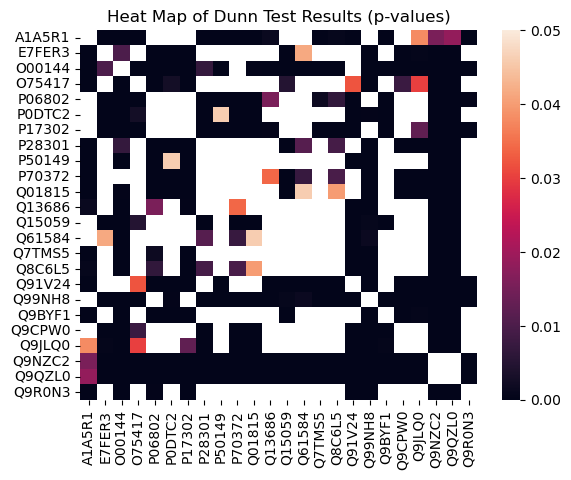

In [43]:
# Run Dunn Test (post-hoc)

# remove N/A values from df
dunn_df = rq2_stat_df[rq2_stat_df['DB_Object_ID'].isin(kept_proteins)][['DB_Object_ID', 'cost_per_protein']]
p_values = sp.posthoc_dunn(
    dunn_df, 
    group_col = 'DB_Object_ID',
    val_col = 'cost_per_protein', 
    p_adjust='holm'
)


# use correlation matrix to visualize statistical significance (only looking at p<0.5)
plt.figure()
sns.heatmap(
    p_values.where(p_values <= 0.05),
    vmin = 0, 
    vmax = 0.05
)
plt.title("Heat Map of Dunn Test Results (p-values)")

# values are filtered for statistical significance, can see several extremely dark values
# specifically black, indicating high presence of bias in NIH funding based on protein

## Violin Plots for Proteins

/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


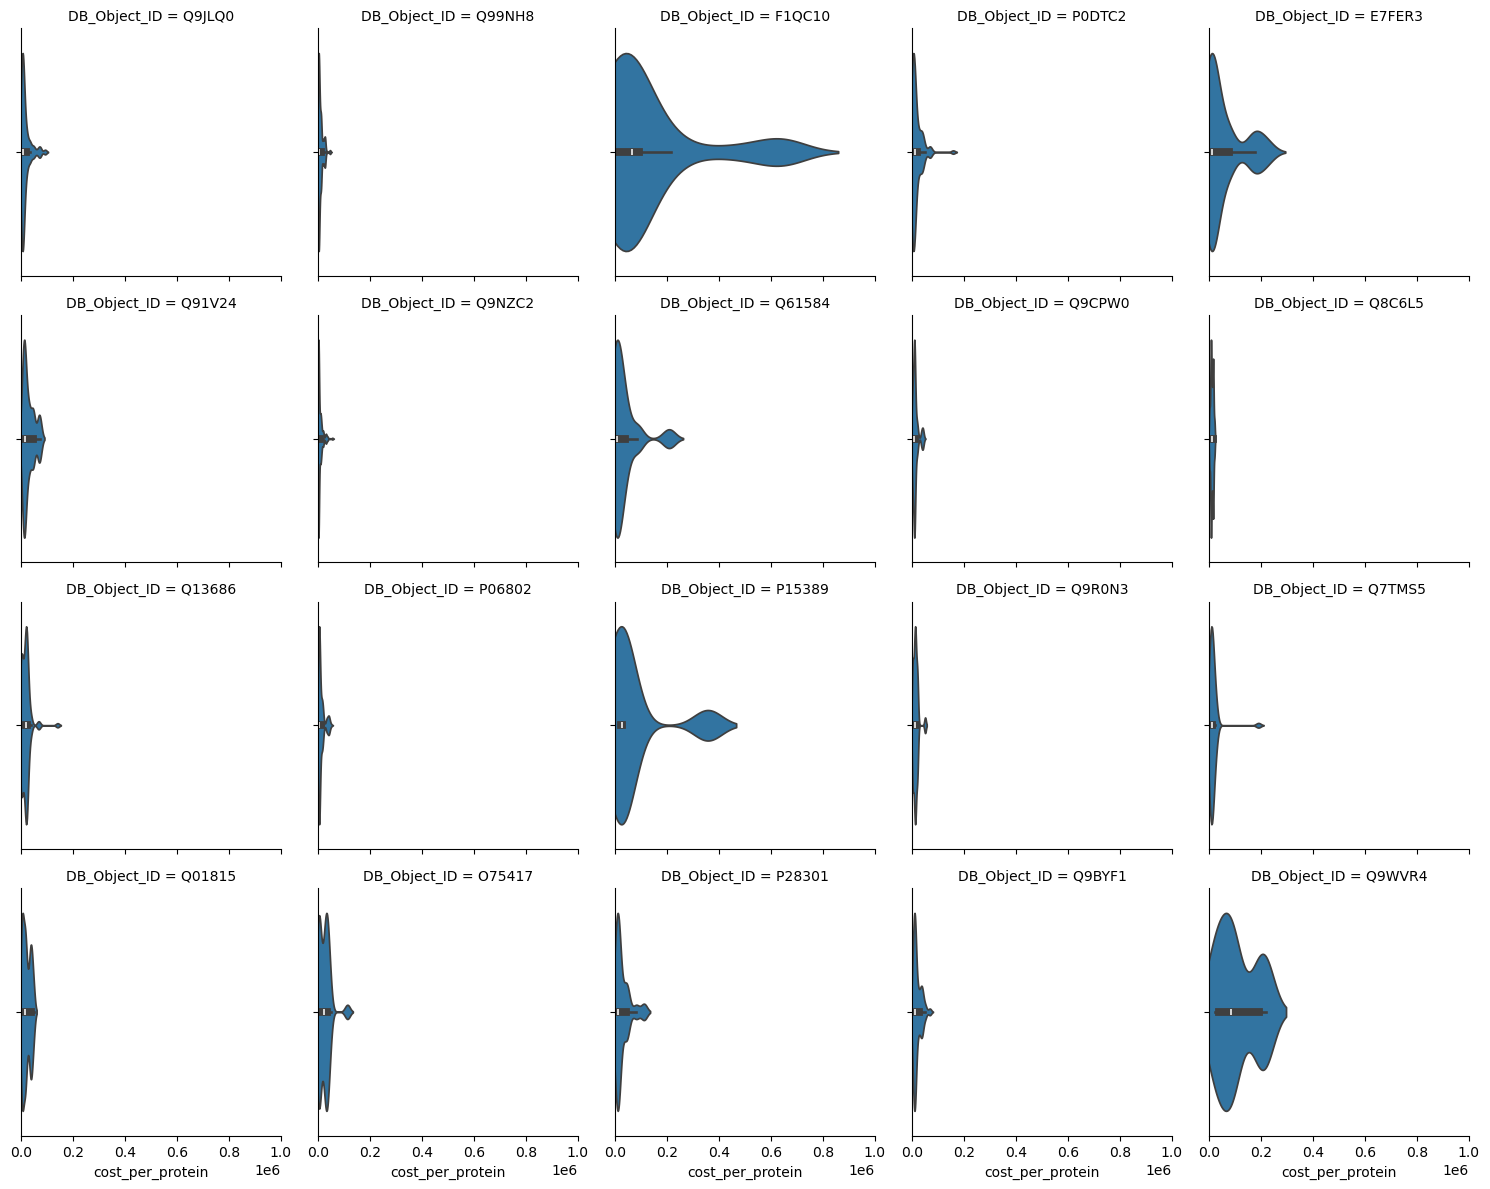

In [48]:
# rq1_stat = df_cost_taxon.groupby('Taxon').agg(
#     total_cost = ('TOTAL_COST', 'sum')
# ).sort_values(by = 'total_cost', ascending = False).reset_index()

# create boxplot to check same shape 
boxplot = sns.FacetGrid(t20_proteins, 
                        col = 'DB_Object_ID', 
                        col_wrap = 5, 
                        sharey = True,
                        sharex = True,
                        col_order = protein_cost_ranks['DB_Object_ID'].head(20),
                        xlim=(0, 1_000_000))
boxplot.map(sns.violinplot, 'cost_per_protein', log_scale=False)

# RQ3
## Money vs. functions

In [ ]:
# -- PART 5: RQ3 - How much NIH money is spent on different functions? Is there a bias?

# x = function = GO_ID, y = TOTAL_COST 

# Task 1: Evaluate overall NIH money across all time (do year after)

# group data by total cost per function across all time 
df_cost_function = data[['GO_ID', 'FUNCTION_TOTAL_COST']]
tot_cost_per_function = df_cost_function.groupby('GO_ID').agg(
    #num_projects = ('Taxon', 'size'), 
    total_cost = ('FUNCTION_TOTAL_COST', 'sum')
    ).sort_values(by = 'total_cost', ascending=False)

# add ranking columns for how they rank against other taxons 
tot_cost_per_function = add_rank_cols(tot_cost_per_function, 'total_cost')

tot_cost_per_function.head()

,total_cost,total_cost_rank
GO_ID,,
GO:0005515,2.178586e+08,1
GO:0005634,2.938860e+07,2
GO:0005886,2.574398e+07,3
GO:0042802,2.032213e+07,4
GO:0005737,1.589172e+07,5


## Bar charts and Pie Charts

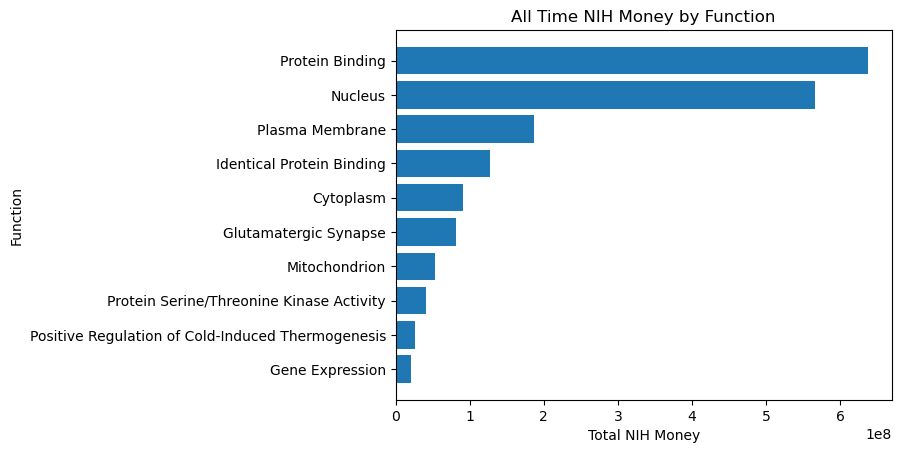

In [ ]:
t10_function_cost = get_top_x(tot_cost_per_function, 'total_cost_rank', 10, False)

# map to human terminology 
function_mapping = {
    'GO:0005515':'Protein Binding',
    'GO:0005634':'Nucleus',
    'GO:0005886':'Plasma Membrane',
    'GO:0042802':'Identical Protein Binding',
    'GO:0005737':'Cytoplasm',
    'GO:0098978':'Glutamatergic Synapse',
    'GO:0005739':'Mitochondrion',
    'GO:0004674':'Protein Serine/Threonine Kinase Activity',
    'GO:0120162':'Positive Regulation of Cold-Induced Thermogenesis',
    'GO:0010467':'Gene Expression'
}

t10_function_cost['GO_ID'] = t10_function_cost['GO_ID'].replace(function_mapping)

# visualize as a bar plot 
plt.barh(t10_function_cost['GO_ID'], t10_taxon_cost['total_cost'])
plt.xlabel('Total NIH Money')
plt.ylabel('Function')
plt.title('All Time NIH Money by Function')
plt.show()


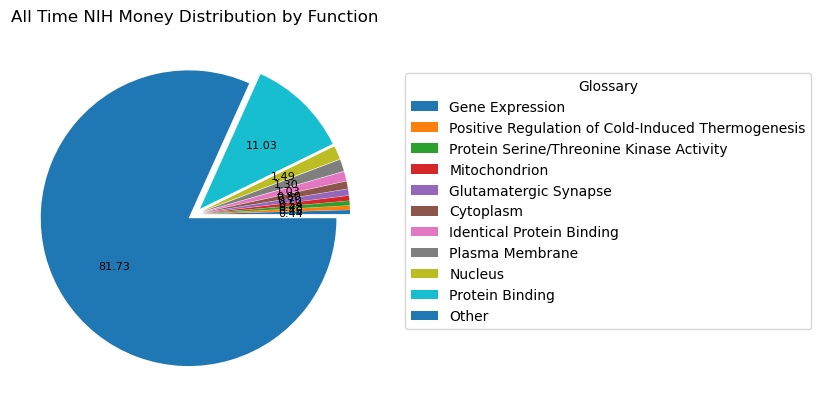

In [ ]:
# visualize as a pie chart, comparing against ALL others 
t10_function_pie = format_for_pie(tot_cost_per_function, t10_function_cost, 'total_cost', 'GO_ID')
plt_explode = [0.05]*11 #[0,0,0,0,0,0,0,0,0,0,0]
#plt.pie(t10_function_pie[0], explode = plt_explode)
plt.pie(t10_function_pie[0], autopct='%.2f', textprops = {'fontsize':8}, explode = plt_explode)
plt.legend(t10_function_pie[1], title = 'Glossary', bbox_to_anchor = (1.05, 0.9))
plt.title('All Time NIH Money Distribution by Function')
plt.show()

## Rankings over time

In [ ]:
# Task 2: Now that we know the overall max, we want to see if these rankings are consistent over time 

# create dataframes that look at the total cost and the number of projects over time
df_func_rank_time = data[['GO_ID', 'FUNCTION_TOTAL_COST', 'FY']]

function_rank_cost_by_year = df_func_rank_time.groupby(['GO_ID', 'FY']).agg(
    total_cost = ('FUNCTION_TOTAL_COST', 'sum')
).reset_index().pivot(index='GO_ID', columns = 'FY', values = 'total_cost')

# add ranking columns for how they rank against other taxons (cost)
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2016, '2016_rank')
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2017, '2017_rank')
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2018, '2018_rank')
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2019, '2019_rank')
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2020, '2020_rank')
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2021, '2021_rank')
function_rank_cost_by_year = add_rank_by_year(function_rank_cost_by_year, 2022, '2022_rank')

function_rank_cost_by_year.head(20)

FY,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2016_rank,2017_rank,2018_rank,2019_rank,2020_rank,2021_rank,2022_rank
GO_ID,,,,,,,,,,,,,,,,,
GO:0000006,6840.250000,9647.670000,9882.810000,9867.840000,2856.300000,2852.120000,NaN,NaN,NaN,NaN,3187,4071,3869,<NA>,<NA>,<NA>,<NA>
GO:0000012,12760.433333,12632.833333,12760.433333,12760.433333,12760.433333,13088.533333,13088.533333,13088.533333,13088.533333,13088.533333,2865,2750,2563,2236,1905,1560,1288
GO:0000018,9773.863636,10085.809091,10397.727273,10397.727273,10128.409091,10192.036364,32238.081818,32544.327273,32544.327273,32684.536364,3119,3056,2878,1268,1037,822,622
GO:0000027,79329.875000,14759.375000,22127.325000,22107.575000,22087.158333,7387.200000,NaN,NaN,NaN,NaN,2126,2020,3174,<NA>,<NA>,<NA>,<NA>
GO:0000028,NaN,NaN,105131.282895,97514.592105,96968.190789,253222.032895,122388.750000,122388.750000,NaN,NaN,525,504,96,271,209,<NA>,<NA>
GO:0000030,8256.125000,8244.321429,8232.196429,8219.714286,19285.750000,18660.750000,18660.750000,18660.750000,NaN,NaN,3403,2189,2095,1848,1564,<NA>,<NA>
GO:0000035,NaN,5413.545455,5287.363636,6395.348485,5514.939394,5544.196970,7814.484848,7827.106061,7827.106061,7827.106061,3649,3635,3431,2769,2382,1974,1673
GO:0000045,1954.638889,33141.777778,36527.859596,36825.950505,37579.873232,98087.332828,82598.746465,79297.830556,79493.997222,2763.761111,1436,1371,464,483,403,297,2309
GO:0000049,17739.216518,18317.820685,18382.570685,13845.251667,39129.413704,38686.358148,38699.321111,38779.515556,31017.074074,33484.518519,2778,1317,1230,1082,881,865,613


In [ ]:
# look at the top 5 taxons and drop all columns unrelated to rank
t5_function = ['GO:0005515', 'GO:0005634', 'GO:0005886', 'GO:0042802', 'GO:0005737']
t5_function_rank_cost_by_year = function_rank_cost_by_year[
    function_rank_cost_by_year.index.isin(t5_function)
].sort_values('2016_rank', ascending=True).reset_index()[
    ['GO_ID', '2016_rank', '2017_rank', '2018_rank', '2019_rank', '2020_rank', '2021_rank', '2022_rank']
]

# can see that while protein binding has consistently remained 1, nucleus funding has dropped starting in 
# 2019, to be replaced by identical protein binding 
t5_function_rank_cost_by_year['GO_ID'] = t5_function_rank_cost_by_year['GO_ID'].replace(function_mapping)
t5_function_rank_cost_by_year

FY,GO_ID,2016_rank,2017_rank,2018_rank,2019_rank,2020_rank,2021_rank,2022_rank
0,Protein Binding,1,1,1,1,1,1,1
1,Nucleus,2,2,2,2,3,3,3
2,Plasma Membrane,3,3,3,4,4,4,4
3,Cytoplasm,4,5,5,5,5,13,7
4,Identical Protein Binding,5,4,4,3,2,2,2


## Funding and projects over time

In [ ]:
# Task 3: Given that protein binding is clearly the most heavily funded and has the most 
# lets take a look at how funding and number of projects has varied over time

# 1 = taxon:9606 (human), 2 = taxon:10090 (house mouse), 3 = taxon:7227 (fruit fly), 
# 4 = taxon:559292 (brewer's yeast), 5 = taxon:7955 (zebrafish)
#df_rank_time = data[['Taxon', 'TOTAL_COST', 'FY']]

# filter for only human taxons 
function_prot_binding = data[data['GO_ID'] == 'GO:0005515'][['FUNCTION_TOTAL_COST', 'FY']]

# get total cost and number of projects per year 
function_prot_binding_cost = function_prot_binding.groupby('FY').agg(
    total_cost = ('FY', 'sum')
).reset_index()

function_prot_binding_cost.head()

,FY,total_cost
0,2013,25699971
1,2014,37025376
2,2015,41277275
3,2016,40509504
4,2017,34397918


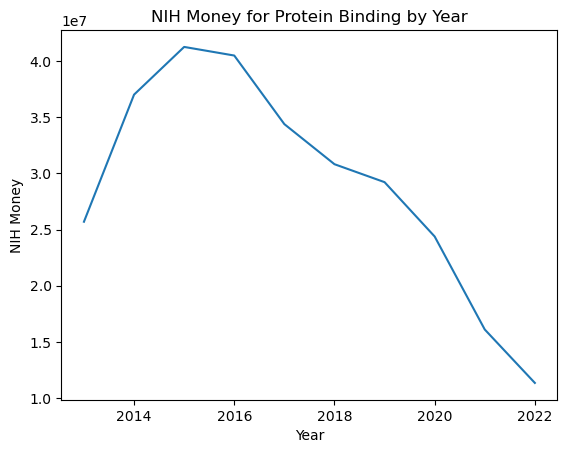

In [ ]:
# plot a line graph showing how total cost has varied over time
plt.plot(function_prot_binding_cost['FY'], function_prot_binding_cost['total_cost'], label = 'Total NIH Funding of Projects')
plt.xlabel('Year')
plt.ylabel('NIH Money')
plt.title('NIH Money for Protein Binding by Year')
plt.show()

## Stats for Bias

In [ ]:
# Task 4: Run a statistical test to see if there is any bias in the NIH funding for different 
# model functions (appears to be for protein binding, but other than that, not so much)

# Kruskal-Wallis: checks for stat. significant differences between them 
# assumptions: ordinal (yes), independent samples (yes), 
# distributions of the groups must have the same shape (uncertain)

rq3_stat_df = data[['GO_ID', 'FUNCTION_TOTAL_COST']]

# Levene test (conclusion: statistically significant, assumption is violated)
list_of_functions = rq3_stat_df['GO_ID'].unique()

data_by_function = []
kept_functions = []
for function in list_of_functions: 
    data_points = rq3_stat_df[rq3_stat_df['GO_ID'] == function]['FUNCTION_TOTAL_COST'].values

    # making 200 so we have 20-40 groups 
    if len(data_points) > 400 and np.std(data_points) > 0: 
        data_by_function.append(data_points)
        kept_functions.append(function)

f, p = levene(*data_by_function)
print(f, p)

171.47802260601605 0.0


In [ ]:
# Run Kruskal-Wallis test (high significance value, indicating a bias)
H, p = kruskal(*data_by_function)
print(H, p)

61593.95700242142 0.0


Text(0.5, 1.0, 'Heat Map of Dunn Test Results (p-values)')

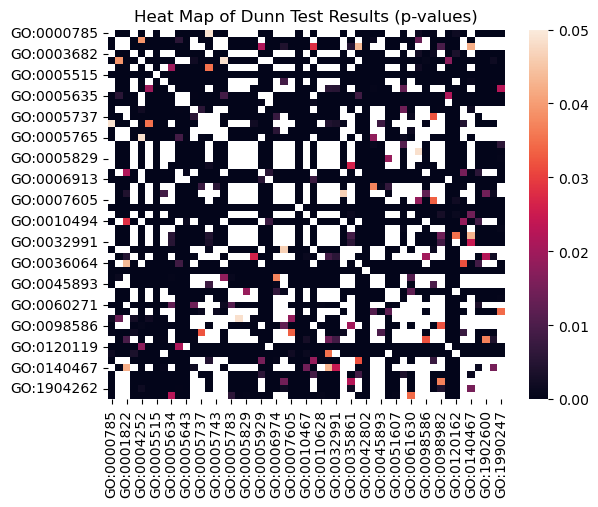

In [ ]:
# Run Dunn Test (post-hoc)

# remove N/A values from df
dunn_df = rq3_stat_df[rq3_stat_df['GO_ID'].isin(kept_functions)][['GO_ID', 'FUNCTION_TOTAL_COST']]
p_values = sp.posthoc_dunn(
    dunn_df, 
    group_col = 'GO_ID',
    val_col = 'FUNCTION_TOTAL_COST', 
    p_adjust='holm'
)

# use correlation matrix to visualize statistical significance (only looking at p<0.5)
plt.figure()
sns.heatmap(
    p_values.where(p_values <= 0.05),
    vmin = 0, 
    vmax = 0.05
)
plt.title("Heat Map of Dunn Test Results (p-values)")

# values are filtered for statistical significance, can see several extremely dark values
# specifically black, indicating high presence of bias in NIH funding based on function 

# RQ4
## Money vs institutions

In [172]:
# -- PART 7: How much NIH money is awarded to different institutions? Is there a bias?

# institution = ORG_NAME

print(f"all data:\n{data[['ORG_NAME', 'TOTAL_COST', 'PROJECT_NUMBER', 'FY']].head(10)}")

# dropping duplicates in the same year.
inst_data = data.drop_duplicates(subset=['PROJECT_NUMBER', 'FY'], keep='first')[['ORG_NAME', 'TOTAL_COST', 'PROJECT_NUMBER', 'FY']]
print(f"All Institutional data:\n{inst_data.head(10)}")

all data:
                                ORG_NAME  TOTAL_COST PROJECT_NUMBER    FY
0  UNIVERSITY OF NEBRASKA MEDICAL CENTER    349161.0    R01MH073490  2014
1  UNIVERSITY OF NEBRASKA MEDICAL CENTER    349161.0    R01MH073490  2014
2                 HARVARD MEDICAL SCHOOL    808286.0    R01GM084947  2016
3                 HARVARD MEDICAL SCHOOL    775374.0    R01GM084947  2013
4                 HARVARD MEDICAL SCHOOL    791836.0    R01GM084947  2014
5                 HARVARD MEDICAL SCHOOL    791836.0    R01GM084947  2014
6                 HARVARD MEDICAL SCHOOL    791836.0    R01GM084947  2014
7                 HARVARD MEDICAL SCHOOL    782420.0    R01GM084947  2015
8                 HARVARD MEDICAL SCHOOL    782420.0    R01GM084947  2015
9                 HARVARD MEDICAL SCHOOL    821851.0    R01GM084947  2017
All Institutional data:
                                 ORG_NAME  TOTAL_COST PROJECT_NUMBER    FY
0   UNIVERSITY OF NEBRASKA MEDICAL CENTER    349161.0    R01MH073490  2014
2 

In [173]:
total_cost_per_inst = inst_data.groupby('ORG_NAME').agg(
    total_cost = ('TOTAL_COST', 'sum')
).sort_values(by = 'total_cost', ascending=False).reset_index()


print(f"\nTotal cost per institution:\n{total_cost_per_inst.head(10)}")


Total cost per institution:
                                  ORG_NAME   total_cost
0  UNIVERSITY OF CALIFORNIA, SAN FRANCISCO  262532616.0
1                    WASHINGTON UNIVERSITY  255198631.0
2      UNIVERSITY OF CALIFORNIA, SAN DIEGO  251254555.0
3                          YALE UNIVERSITY  249340798.0
4               UNIVERSITY OF PENNSYLVANIA  240173928.0
5           UT SOUTHWESTERN MEDICAL CENTER  222362601.0
6      UNIVERSITY OF MICHIGAN AT ANN ARBOR  210770771.0
7               BOSTON CHILDREN'S HOSPITAL  206235966.0
8                 JOHNS HOPKINS UNIVERSITY  189801161.0
9                   HARVARD MEDICAL SCHOOL  184317233.0


In [174]:
# add ranking columns for how they rank against other taxons 
total_cost_per_inst = add_rank_cols(total_cost_per_inst, 'total_cost')

# get top 10 taxons with the highest total cost 
t10_inst_cost = get_top_x(total_cost_per_inst, 'total_cost_rank', 10, False)

t10_inst_cost.head(10)

,index,ORG_NAME,total_cost,total_cost_rank
9,9,HARVARD MEDICAL SCHOOL,184317233.0,10
8,8,JOHNS HOPKINS UNIVERSITY,189801161.0,9
7,7,BOSTON CHILDREN'S HOSPITAL,206235966.0,8
6,6,UNIVERSITY OF MICHIGAN AT ANN ARBOR,210770771.0,7
5,5,UT SOUTHWESTERN MEDICAL CENTER,222362601.0,6
4,4,UNIVERSITY OF PENNSYLVANIA,240173928.0,5
3,3,YALE UNIVERSITY,249340798.0,4
2,2,"UNIVERSITY OF CALIFORNIA, SAN DIEGO",251254555.0,3
1,1,WASHINGTON UNIVERSITY,255198631.0,2
0,0,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",262532616.0,1


## Bar charts and Pie Charts

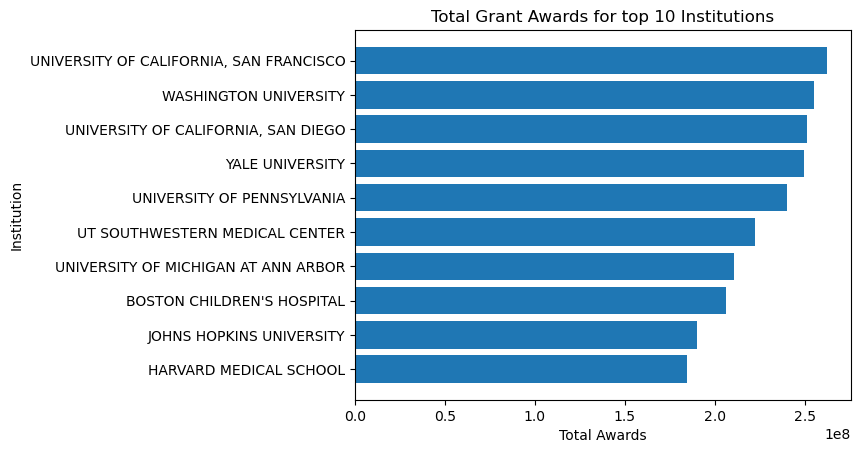

In [175]:
# visualize as a bar plot 
plt.barh(t10_inst_cost['ORG_NAME'], t10_inst_cost['total_cost'])
plt.xlabel('Total Awards')
plt.ylabel('Institution')
plt.title('Total Grant Awards for top 10 Institutions')
plt.show()

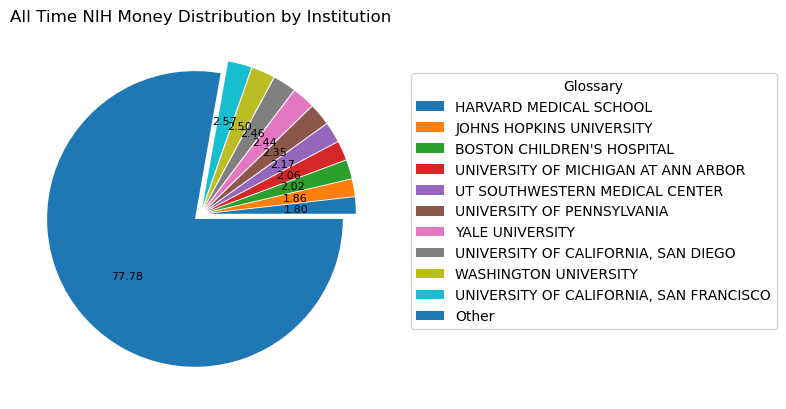

In [176]:
# visualize as a pie chart, comparing against ALL others 
t10_inst_pie = format_for_pie(total_cost_per_inst, t10_inst_cost, 'total_cost', 'ORG_NAME')
plt_explode = [0.05]*11 #[0,0,0,0,0,0,0,0,0,0,0]
#plt.pie(t10_function_pie[0], explode = plt_explode)
plt.pie(t10_inst_pie[0], autopct='%.2f', textprops = {'fontsize':8}, explode = plt_explode)
plt.legend(t10_inst_pie[1], title = 'Glossary', bbox_to_anchor = (1.05, 0.9))
plt.title('All Time NIH Money Distribution by Institution')
plt.show()

## Insititutions over time

In [177]:
# Get institutional costs by year
years_inst_cost = inst_data.groupby(['FY', 'ORG_NAME']).agg(
    total_cost = ('TOTAL_COST', 'sum')
).reset_index()

years_inst_cost.head(20)

,FY,ORG_NAME,total_cost
0,2013,AARON DIAMOND AIDS RESEARCH CENTER,421825.0
1,2013,ALBANY MEDICAL COLLEGE,706143.0
2,2013,ALBERT EINSTEIN COLLEGE OF MEDICINE,9721907.0
3,2013,"ALLOSTEROS THERAPEUTICS, INC.",257692.0
4,2013,ARIZONA STATE UNIVERSITY-TEMPE CAMPUS,1446950.0
5,2013,AUGUSTA UNIVERSITY,3737208.0
6,2013,BAYCREST CENTRE FOR GERIATRIC CARE,206702.0
7,2013,BAYLOR COLLEGE OF MEDICINE,11553108.0
8,2013,BECKMAN RESEARCH INSTITUTE/CITY OF HOPE,2148653.0
9,2013,BETH ISRAEL DEACONESS MEDICAL CENTER,4431807.0


In [178]:
# Pivot to get institutions as rows and years as columns
inst_cost_by_year = years_inst_cost.pivot(index='ORG_NAME', columns='FY', values='total_cost').fillna(0)

# Get top institutions by 2022 cost
t5_inst = inst_cost_by_year.nlargest(5,columns=2016)
t5_inst.head()

FY,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ORG_NAME,,,,,,,,,,
YALE UNIVERSITY,22866593.0,26858095.0,32924145.0,36320281.0,35620039.0,28067942.0,22232458.0,16691265.0,14358479.0,13401501.0
WASHINGTON UNIVERSITY,21460817.0,25216690.0,32643273.0,33548047.0,27861515.0,28681507.0,26142246.0,21856456.0,20883320.0,16904760.0
"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",23957939.0,28189654.0,33548693.0,32927338.0,32566057.0,32513255.0,25915537.0,20448264.0,17144517.0,15321362.0
UNIVERSITY OF MICHIGAN AT ANN ARBOR,21123381.0,22204953.0,29700083.0,32288265.0,26548917.0,23588561.0,18895745.0,15040014.0,12052206.0,9328646.0
"UNIVERSITY OF CALIFORNIA, SAN DIEGO",23224281.0,27146315.0,29701652.0,30300511.0,32968175.0,28551595.0,25664760.0,19355876.0,19038984.0,15302406.0


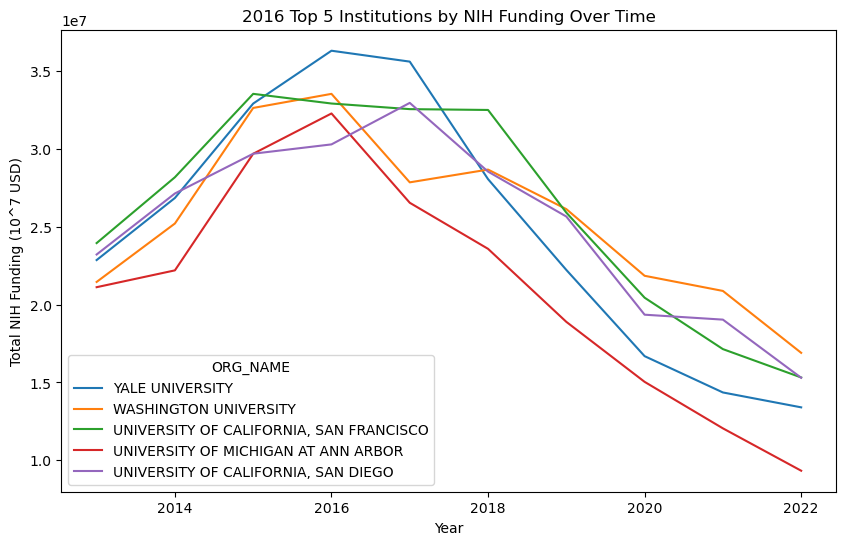

In [179]:
plot = t5_inst.T.plot(kind='line', figsize=(10,6), title='2016 Top 5 Institutions by NIH Funding Over Time', xlabel='Year', ylabel='Total NIH Funding (10^7 USD)')

## Stats for Bias

In [180]:
# boxplot is difficult to visualize so switching to checking if distribution has similar 
# variance via Levene (conclusion: statistically significant, assumption is violated)

# We only check among the top N institutions.
# We can run the next few cells with different values of N to see how it affects the results.

N = 20

rq4_stat_df = inst_data[
    inst_data['ORG_NAME'].isin(total_cost_per_inst['ORG_NAME'].head(N))
]

list_of_inst = rq4_stat_df['ORG_NAME'].unique()

data_by_inst = []
kept_inst = []
for inst in list_of_inst: 
    data_points = rq4_stat_df[rq4_stat_df['ORG_NAME'] == inst]['TOTAL_COST'].values

    # avoids nan issue with fewer than 5 data points
    if len(data_points) > 50 and np.std(data_points) > 0: 
        data_by_inst.append(data_points)
        kept_inst.append(inst)

print(f"length of inst data: {len(data_by_inst)}")
f, p = levene(*data_by_inst)
print(f"levene (f, p) = {f}, {p}")

length of inst data: 20
levene (f, p) = 6.613593620292134, 1.320685969280608e-17


In [181]:
# Run Kruskal-Wallis test (high significance value, indicating a bias)
H, p = kruskal(*data_by_inst)
print(f"Kruskal (H, p) = {H}, {p}")
print(f"length kept inst: {len(kept_inst)}")

Kruskal (H, p) = 495.09440806026487, 5.973182822993807e-93
length kept inst: 20


Text(0.5, 1.0, 'Heat Map of Dunn Test Results (p-values)')

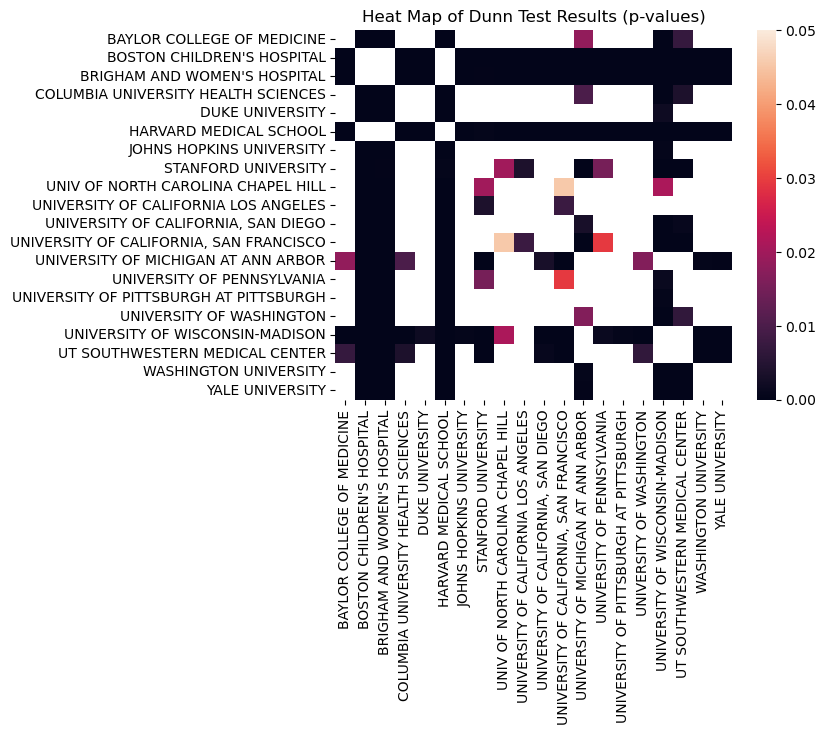

In [183]:
# Run Dunn Test (post-hoc)

# remove N/A values from df
dunn_df = rq4_stat_df[rq4_stat_df['ORG_NAME'].isin(kept_inst)][['ORG_NAME', 'TOTAL_COST']]
p_values = sp.posthoc_dunn(
    dunn_df, 
    group_col = 'ORG_NAME',
    val_col = 'TOTAL_COST', 
    p_adjust='holm'
)


# use correlation matrix to visualize statistical significance (only looking at p<0.5)
plt.figure()
sns.heatmap(
    p_values.where(p_values <= 0.05),
    vmin = 0, 
    vmax = 0.05
)
plt.title("Heat Map of Dunn Test Results (p-values)")

# values are filtered for statistical significance, can see several extremely dark values
# specifically black, indicating high presence of bias in NIH funding based on protein

# RQ5
## Money vs states

In [ ]:
# -- PART 8: How much NIH money is awarded to different states? Is there a bias?

# x = state = ORG_STATE, y = TOTAL_COST 

# Task 1: Evaluate overall NIH money across all time (do year after)

# only keep first instance of project data (don't want duplicate numbers)
state_data = data.drop_duplicates(subset = 'PROJECT_NUMBER', keep='first')

# group data by total cost per taxon across all time 
df_cost_state = state_data[['ORG_STATE', 'TOTAL_COST']]
tot_cost_per_state = df_cost_state.groupby('ORG_STATE').agg(
    total_cost = ('TOTAL_COST', 'sum')
    ).sort_values(by = 'total_cost', ascending=False)

# add ranking columns for how they rank against other taxons 
tot_cost_per_state = add_rank_cols(tot_cost_per_state, 'total_cost')

tot_cost_per_state.head()

,total_cost,total_cost_rank
ORG_STATE,,
CA,328370819.0,1
MA,255127641.0,2
NY,214602637.0,3
PA,129944157.0,4
TX,127866173.0,5


## Bar Charts and Pie Charts

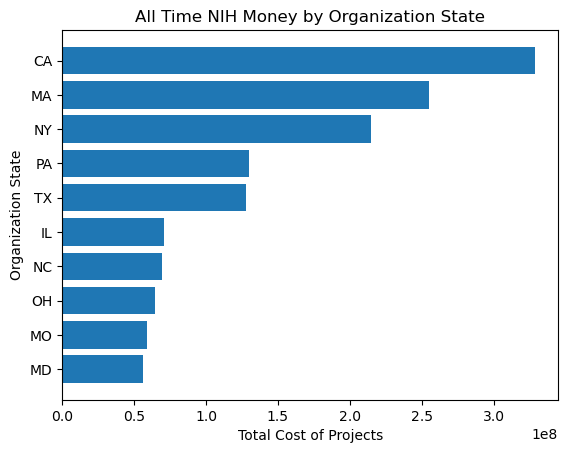

In [ ]:
# get top 10 states with the highest total cost 
t10_state_cost = get_top_x(tot_cost_per_state, 'total_cost_rank',10, False)
t10_state_cost 
# visualize as a bar plot 
plt.barh(t10_state_cost['ORG_STATE'], t10_state_cost['total_cost'])
plt.xlabel('Total Cost of Projects')
plt.ylabel('Organization State')
plt.title('All Time NIH Money by Organization State')
plt.show()

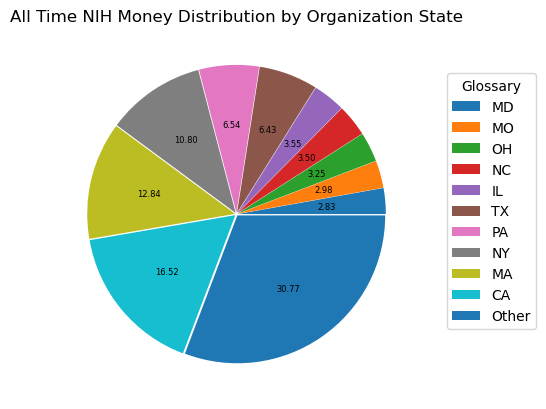

In [ ]:
# visualize as a pie chart, comparing against ALL others 
t10_state_pie = format_for_pie(tot_cost_per_state, t10_state_cost, 'total_cost', 'ORG_STATE')
plt_explode = [0.01]*11 #[0,0,0,0,0,0,0,0,0,0,0]
#plt.pie(t10_state_pie[0], explode = plt_explode)
plt.pie(t10_state_pie[0], autopct='%.2f', textprops = {'fontsize':6}, explode = plt_explode)
plt.legend(t10_state_pie[1], title = 'Glossary', bbox_to_anchor = (1.05, 0.9))
plt.title('All Time NIH Money Distribution by Organization State')
plt.show()

## Rankings over time

In [ ]:
# Task 2: Now that we know the overall max, we want to see if these rankings are consistent over time 

# create dataframes that look at the total cost and the number of projects over time
df_state_rank_time = state_data[['ORG_STATE', 'TOTAL_COST', 'FY']]

state_rank_cost_by_year = df_state_rank_time.groupby(['ORG_STATE', 'FY']).agg(
    total_cost = ('TOTAL_COST', 'sum')
).reset_index().pivot(index='ORG_STATE', columns = 'FY', values = 'total_cost')

# add ranking columns for how they rank against other taxons (cost)
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2016, '2016_rank')
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2017, '2017_rank')
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2018, '2018_rank')
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2019, '2019_rank')
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2020, '2020_rank')
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2021, '2021_rank')
state_rank_cost_by_year = add_rank_by_year(state_rank_cost_by_year, 2022, '2022_rank')

state_rank_cost_by_year.head(20)

FY,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2016_rank,2017_rank,2018_rank,2019_rank,2020_rank,2021_rank,2022_rank
ORG_STATE,,,,,,,,,,,,,,,,,
AL,1874247.0,1344852.0,746445.0,1144867.0,1419648.0,1200251.0,888627.0,NaN,NaN,NaN,30,28,20,25,<NA>,<NA>,<NA>
AR,1165891.0,725242.0,294275.0,648500.0,NaN,NaN,NaN,NaN,NaN,NaN,33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
AZ,2374147.0,840869.0,2002094.0,2294615.0,721450.0,710645.0,1020897.0,538257.0,NaN,NaN,25,35,27,22,21,<NA>,<NA>
BC,267961.0,250718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
CA,76021238.0,52068148.0,51129658.0,60968365.0,36677569.0,20125133.0,14734737.0,10664857.0,4610634.0,1370480.0,1,1,1,1,1,2,1
CO,7161073.0,5991685.0,4609628.0,6645965.0,1862216.0,1032210.0,40390.0,NaN,444772.0,552376.0,16,25,22,36,<NA>,16,10
CT,15193231.0,6462362.0,8968397.0,12673223.0,4720985.0,3062369.0,2061115.0,1471076.0,1181763.0,NaN,6,14,13,13,12,7,<NA>
DC,3345951.0,412344.0,NaN,496331.0,1241723.0,408263.0,382607.0,NaN,NaN,NaN,35,29,35,33,<NA>,<NA>,<NA>
DE,NaN,NaN,NaN,252689.0,NaN,NaN,343634.0,110991.0,391800.0,NaN,41,<NA>,<NA>,34,27,17,<NA>


In [ ]:
# look at the top 5 states and drop all columns unrelated to rank
t5_state = ['CA', 'MA', 'NY', 'PA', 'TX']

t5_state_rank_cost_by_year = state_rank_cost_by_year[
    state_rank_cost_by_year.index.isin(t5_state)
].sort_values('2016_rank', ascending=True).reset_index()[
    ['ORG_STATE', '2016_rank', '2017_rank', '2018_rank', '2019_rank', '2020_rank', '2021_rank', '2022_rank']
]

t5_state_rank_cost_by_year

FY,ORG_STATE,2016_rank,2017_rank,2018_rank,2019_rank,2020_rank,2021_rank,2022_rank
0,CA,1,1,1,1,1,2,1
1,MA,2,2,2,2,3,1,3
2,NY,3,3,4,3,2,14,2
3,TX,4,5,5,7,5,6,5
4,PA,5,4,3,4,4,5,<NA>


## California over time

In [ ]:
# Task 3: Given that California is clearly the most heavily funded 
# lets take a look at how funding and number of projects has varied over time

# filter for only human taxons 
state_ca = state_data[state_data['ORG_STATE'] == 'CA'][['TOTAL_COST', 'FY']]

# get total cost and number of projects per year 
state_ca_cost = state_ca.groupby('FY').agg(
    total_cost = ('FY', 'sum')
).reset_index()

state_ca_cost.head()

,FY,total_cost
0,2013,418704
1,2014,255778
2,2015,247845
3,2016,284256
4,2017,171445


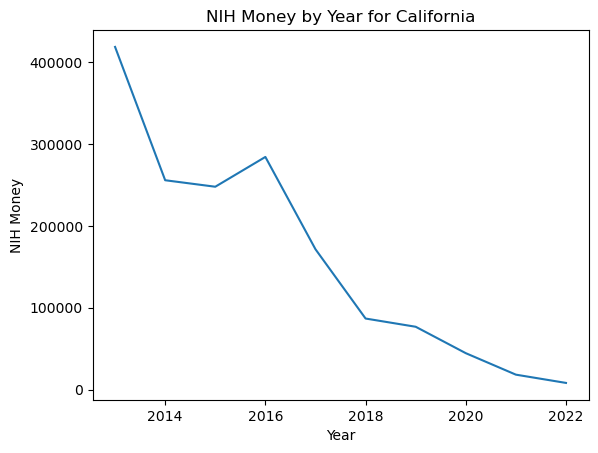

In [ ]:
# plot a line graph showing how total cost and num projects have varied over time
plt.plot(state_ca_cost['FY'], state_ca_cost['total_cost'], label = 'Total NIH Funding of Projects')
plt.xlabel('Year')
plt.ylabel('NIH Money')
plt.title('NIH Money by Year for California')
plt.show()

## Stats for Bias

/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


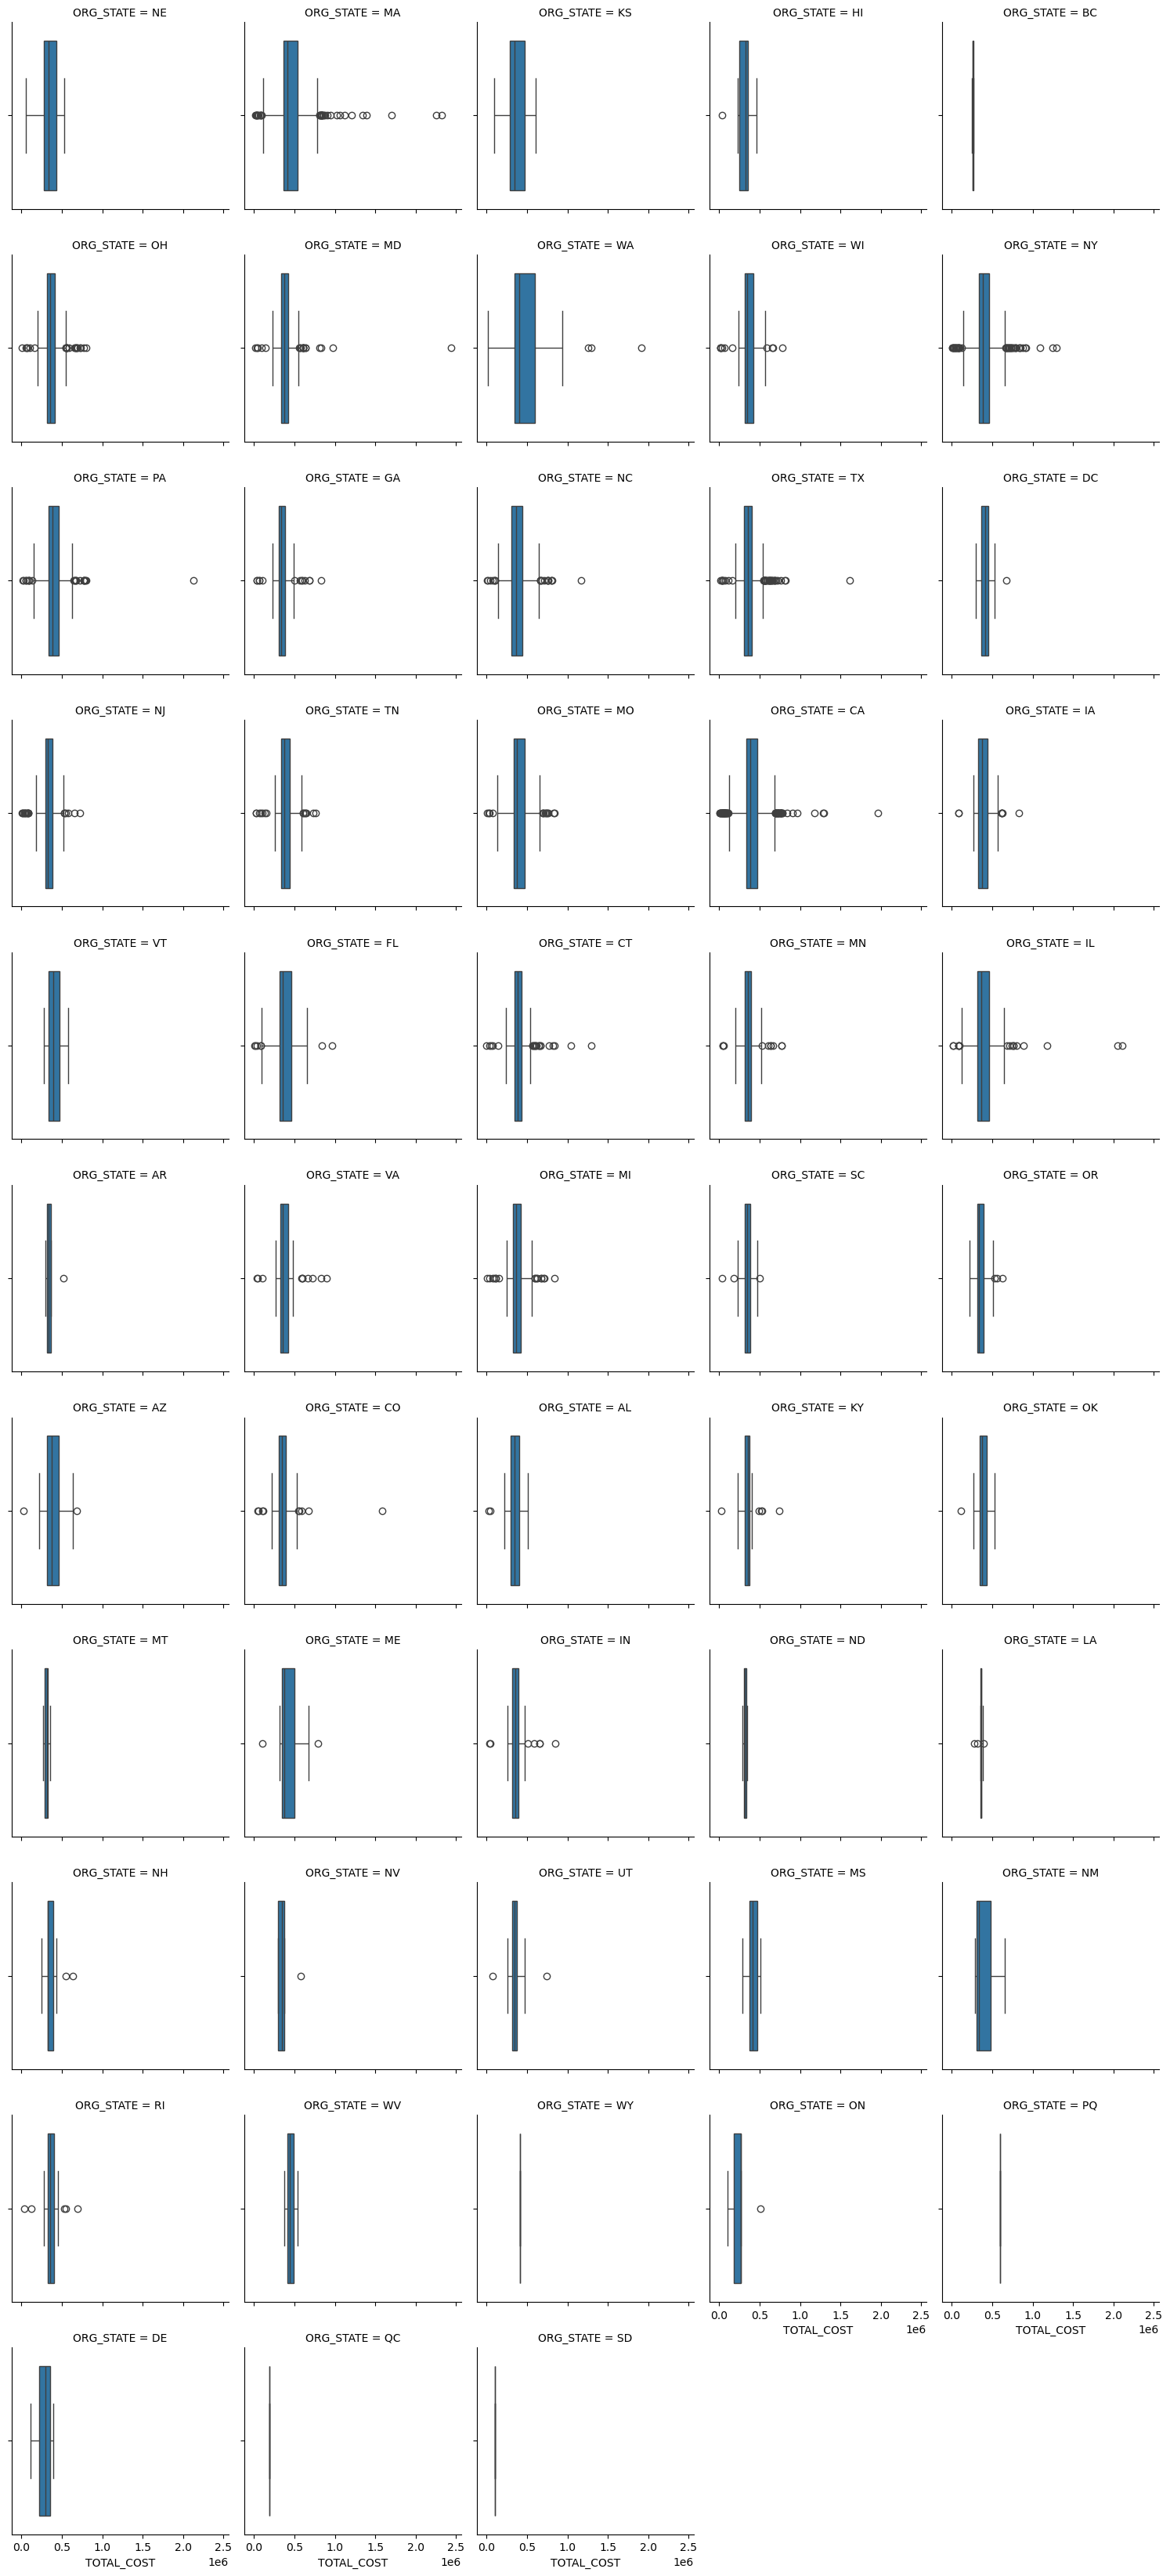

In [ ]:
# Task 4: Run a statistical test to see if there is any bias in the NIH funding for different 
# model organisms (spoiler alert: answer is yes)

# Kruskal-Wallis: checks for stat. significant differences between them 
# assumptions: ordinal (yes), independent samples (yes), 
# distributions of the groups must have the same shape (uncertain)

rq5_stat_df = state_data[['ORG_STATE', 'TOTAL_COST']]

# create boxplot to check same shape 
boxplot = sns.FacetGrid(rq5_stat_df, col = 'ORG_STATE', col_wrap = 5, sharey = False)
boxplot.map(sns.boxplot, 'TOTAL_COST')

In [ ]:
# boxplot is difficult to visualize so switching to checking if distribution has similar 
# variance via Levene (conclusion: statistically significant, assumption is violated)
list_of_taxons = rq5_stat_df['ORG_STATE'].unique()

data_by_state = []
kept_state = []
for state in list_of_taxons: 
    data_points = rq5_stat_df[rq5_stat_df['ORG_STATE'] == state]['TOTAL_COST'].values

    # avoids nan issue with fewer than 5 data points (gives us 50 groups)
    if len(data_points) > 5 and np.std(data_points) > 0: 
        data_by_state.append(data_points)
        kept_state.append(state)

f, p = levene(*data_by_state)
print(f, p)

2.790337949358156 2.1842098477734013e-08


In [ ]:
# Run Kruskal-Wallis test (high significance value, indicating a bias)
H, p = kruskal(*data_by_state)
print(H, p)

278.6644440092528 5.918434379099513e-38


Text(0.5, 1.0, 'Heat Map of Dunn Test Results (p-values)')

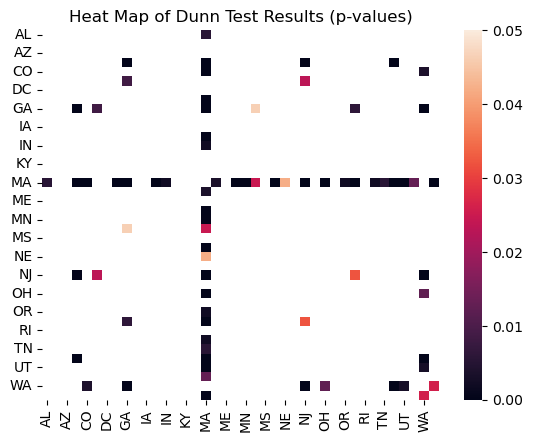

In [ ]:
# Run Dunn Test (post-hoc)

# remove N/A values from df
dunn_df = rq5_stat_df[rq5_stat_df['ORG_STATE'].isin(kept_state)][['ORG_STATE', 'TOTAL_COST']]
p_values = sp.posthoc_dunn(
    dunn_df, 
    group_col = 'ORG_STATE',
    val_col = 'TOTAL_COST', 
    p_adjust='holm'
)


# use correlation matrix to visualize statistical significance (only looking at p<0.5)
plt.figure()
sns.heatmap(
    p_values.where(p_values <= 0.05),
    vmin = 0, 
    vmax = 0.05
)
plt.title("Heat Map of Dunn Test Results (p-values)")

# values are filtered for statistical significance, can see several extremely dark values
# specifically black, indicating high presence of bias in NIH funding based on taxon 

# RQ6
## Money over time

In [ ]:
# -- PART 9: Has there been a change in amounts of funding awarded over time?

# year = 'FY' ('PROJECT_START', 'PROJECT_END')

